In [1]:
# Make relevant plots of:
#  - Policies (as histogram)
#  - Policies (as bar chart)
#  - Diff in dose vs observed mortality for diff policies

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
action_df = pd.read_csv("/Users/amir/code/rlsepsis234/cs238_sepsis_rl/data/action_df.csv")
df_orig = pd.read_csv("/Users/amir/code/rlsepsis234/cs238_sepsis_rl/data/test_state_action_reward_df_no_scale.csv")
df_results = pd.read_csv("/Users/amir/Downloads/pred_real_compare_new")

In [8]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [30]:
df_results.count()

Unnamed: 0             19488
subject_id             19488
hadm_id                19488
icustay_id             19488
interval_start_time    19488
interval_end_time      19488
sofa                   19488
iv_pred                19488
iv_real                19488
vaso_pred              19488
vaso_real              19488
died                   19488
dtype: int64

In [31]:
df_orig.count()

subject_id                39232
hadm_id                   39232
icustay_id                39232
interval_start_time       39232
interval_end_time         39232
ALBUMIN                   39232
ANION GAP                 39232
BANDS                     39232
BICARBONATE               39232
BILIRUBIN                 39232
BUN                       39232
CHLORIDE                  39232
CREATININE                39232
DiasBP                    39232
Glucose                   39232
GLUCOSE                   39232
HeartRate                 39232
HEMATOCRIT                39232
HEMOGLOBIN                39232
INR                       39232
LACTATE                   39232
MeanBP                    39232
PaCO2                     39232
PLATELET                  39232
POTASSIUM                 39232
PT                        39232
PTT                       39232
RespRate                  39232
SODIUM                    39232
SpO2                      39232
SysBP                     39232
TempC   

In [37]:
df_orig[["subject_id", "hadm_id","icustay_id", "interval_start_time", "interval_end_time", "sofa"]]

,subject_id,hadm_id,icustay_id,interval_start_time,interval_end_time,sofa
0,26,197661,244882,2126-05-09T00:05:00Z,2126-05-09T04:05:00Z,2
1,26,197661,244882,2126-05-09T04:05:00Z,2126-05-09T08:05:00Z,2
2,26,197661,244882,2126-05-09T08:05:00Z,2126-05-09T12:05:00Z,2
3,26,197661,244882,2126-05-10T00:05:00Z,2126-05-10T04:05:00Z,2
4,26,197661,244882,2126-05-10T16:05:00Z,2126-05-10T20:05:00Z,2
5,26,197661,244882,2126-05-11T04:05:00Z,2126-05-11T08:05:00Z,2
6,145,198161,226841,2144-03-29T19:00:00Z,2144-03-29T23:00:00Z,2
7,145,198161,226841,2144-03-29T23:00:00Z,2144-03-30T03:00:00Z,2
8,145,198161,226841,2144-03-30T03:00:00Z,2144-03-30T07:00:00Z,2
9,145,198161,226841,2144-03-30T07:00:00Z,2144-03-30T11:00:00Z,2


In [43]:
data=df_results.join(df_orig[["subject_id", "hadm_id","icustay_id", "interval_start_time", "interval_end_time", "sofa"]], how="left", lsuffix="_left")

In [14]:
def decode (df):
    df['vaso'] = inv_action_map[df.discrete_action][1]
    df['iv']= inv_action_map[int(df.discrete_action)][0]
    return df

In [46]:
data.columns

Index(['Unnamed: 0', 'subject_id_left', 'hadm_id_left', 'icustay_id_left',
       'interval_start_time_left', 'interval_end_time_left', 'sofa_left',
       'iv_pred', 'iv_real', 'vaso_pred', 'vaso_real', 'died', 'subject_id',
       'hadm_id', 'icustay_id', 'interval_start_time', 'interval_end_time',
       'sofa'],
      dtype='object')

(array([5271.,    0.,    0.,    0.,    0.,    0.,  663.,    0.,    0.,
           0.,    0.,    0., 2701.,    0.,    0.,    0.,    0.,    0.,
        7315.,    0.,    0.,    0.,    0.,    0., 3538.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  ]),
 <a list of 25 Patch objects>)

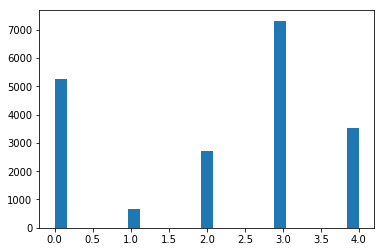

In [47]:
plt.hist(data.iv_pred, bins=25)

(array([17859.,     0.,     0.,     0.,     0.,     0.,   447.,     0.,
            0.,     0.,     0.,     0.,   397.,     0.,     0.,     0.,
            0.,     0.,   381.,     0.,     0.,     0.,     0.,     0.,
          404.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  ]),
 <a list of 25 Patch objects>)

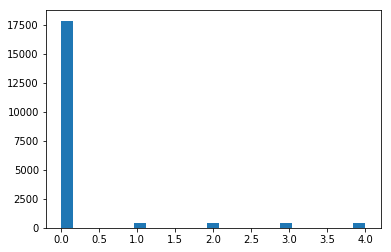

In [48]:
plt.hist(data.iv_real, bins=25)

In [49]:
def graph(title, iv, vaso):
    plt.hist2d(iv, vaso, bins=5, cmap='OrRd')
    plt.title(title)
    plt.ylabel("IV")
    plt.xlabel("Vasopressors")
    plt.colorbar(label = "Action counts")

(array([ 244., 5784., 6179., 3426., 1172., 1553.,  632.,  324.,  123.,
          51.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

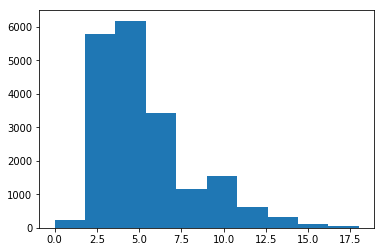

In [51]:
plt.hist(data.sofa)

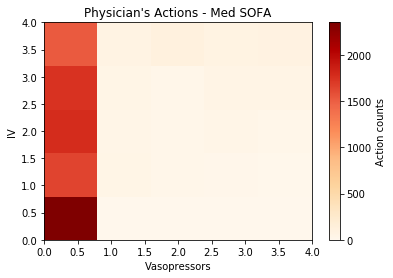

In [52]:
med_sofa = data[data['sofa'].between(5, 15, inclusive=True)]

graph("Physician's Actions - Med SOFA", med_sofa.iv_real, med_sofa.vaso_real)

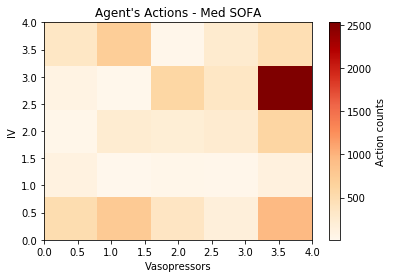

In [57]:
graph("Agent's Actions - Med SOFA", med_sofa.vaso_pred, med_sofa.iv_pred)

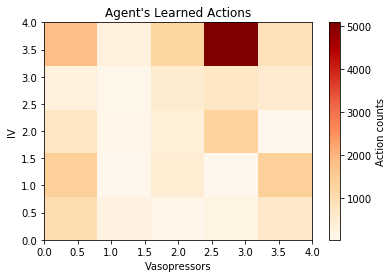

In [54]:
plt.hist2d(data.iv_pred, data.vaso_pred, bins=5, cmap='OrRd')
plt.title("Agent's Learned Actions")
plt.ylabel("IV")
plt.xlabel("Vasopressors")
plt.colorbar(label = "Action counts")

Text(0.5, 1.0, 'Vasopressors Agent')

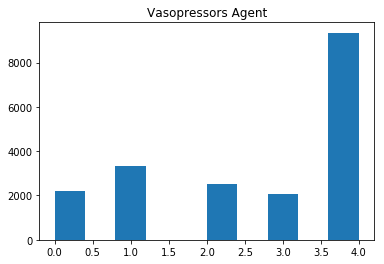

In [55]:
plt.hist(data.vaso_pred, bins=10)
plt.title("Vasopressors Agent")

In [34]:
med_sofa = data[data['sofa_x'].between(15, 20, inclusive=True)]

In [35]:
med_sofa = med_sofa.fillna(0)

def vaso_diff(df):
    df["vaso_diff"] = df.vaso_pred  - df.vaso_real
    return df

def iv_diff(df):
    df["iv_diff"] = df.iv_pred  - df.iv_real
    return df

In [36]:
med_sofa.head()

,iv_pred,vaso_pred,iv_real,vaso_real,died,sofa_x
875,0,0,0,1,1,15
876,0,3,0,3,1,15
877,2,2,0,4,1,15
878,2,2,0,1,1,15
879,2,2,0,1,1,15


In [37]:
med_sofa = med_sofa.apply(vaso_diff,  axis=1)
med_sofa = med_sofa.apply(iv_diff,  axis=1)

In [53]:
med_sofa.count()

iv_pred      216
vaso_pred    216
iv_real      216
vaso_real    216
died         216
sofa_x       216
vaso_diff    216
iv_diff      216
dtype: int64

In [39]:
def mortality(df):
    return sum(df['died'])/df['died'].count()

med_sofa_vaso = med_sofa.groupby("vaso_diff").apply(mortality)
med_sofa_iv = med_sofa.groupby("iv_diff").apply(mortality)

In [40]:
med_sofa_vaso

vaso_diff
-4    0.437500
-3    0.697674
-2    0.760000
-1    0.647059
 0    0.720000
 1    0.666667
 2    1.000000
dtype: float64

In [48]:
med_sofa.groupby(["vaso_pred", "iv_pred"]).agg("count").reset_index()[["vaso_pred", "vaso_pred", "iv_pred"]]

,vaso_pred,vaso_pred,iv_pred
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4
5,1,1,1
6,1,1,2
7,1,1,3
8,1,1,4
9,2,2,1


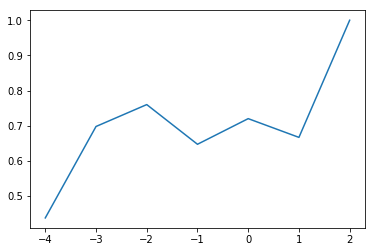

In [41]:
plt.plot(med_sofa_vaso)

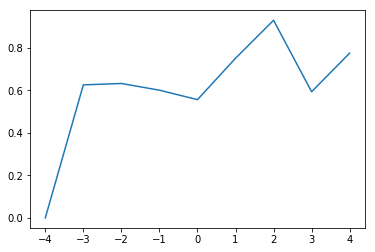

In [44]:
plt.plot(med_sofa_iv)

(array([4599.,    0., 3585.,  104., 3492.,  158., 3570.,  248., 3199.,
         572.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

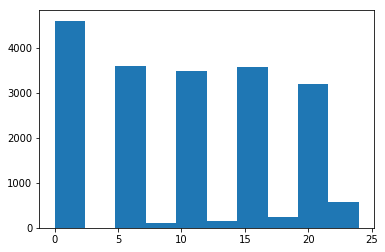

In [43]:
plt.hist(action_df['discrete_action'])

In [ ]:
sns.jointplot("vaso_real", "iv_real", data=med_sofa, kind="hex")

In [ ]:
plt.hist2d()

In [ ]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [ ]:
phys_actions_tuple = [None for i in range(len(phys_actions))]
deeprl2_actions_tuple = [None for i in range(len(phys_actions))]
autoencode_actions_tuple = [None for i in range(len(phys_actions))]                                          

for i in range(len(phys_actions)):
    phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
    deeprl2_actions_tuple[i] = inv_action_map[deeprl2_actions[i]]
    autoencode_actions_tuple[i] = inv_action_map[autoencode_actions[i]]

In [ ]:
phys_actions_tuple = np.array(phys_actions_tuple)
deeprl2_actions_tuple = np.array(deeprl2_actions_tuple)
autoencode_actions_tuple = np.array(autoencode_actions_tuple)

In [ ]:
phys_actions_iv = phys_actions_tuple[:,0]
phys_actions_vaso = phys_actions_tuple[:,1]
hist, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

In [ ]:
deeprl2_actions_iv = deeprl2_actions_tuple[:,0]
deeprl2_actions_vaso = deeprl2_actions_tuple[:,1]
hist2, _, _ = np.histogram2d(deeprl2_actions_iv, deeprl2_actions_vaso, bins=5)

In [ ]:
autoencode_actions_iv = autoencode_actions_tuple[:,0]
autoencode_actions_vaso = autoencode_actions_tuple[:,1]
hist3, _, _ = np.histogram2d(autoencode_actions_iv, autoencode_actions_vaso, bins=5)

In [ ]:
x_edges = np.arange(-0.5,5)
y_edges = np.arange(-0.5,5)

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.imshow(np.flipud(hist), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist2), cmap="OrRd", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax3.imshow(np.flipud(hist3), cmap="Greens", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# ax1.grid(color='b', linestyle='-', linewidth=1)
# ax2.grid(color='r', linestyle='-', linewidth=1)
# ax3.grid(color='g', linestyle='-', linewidth=1)

# Major ticks
ax1.set_xticks(np.arange(0, 5, 1));
ax1.set_yticks(np.arange(0, 5, 1));
ax2.set_xticks(np.arange(0, 5, 1));
ax2.set_yticks(np.arange(0, 5, 1));
ax3.set_xticks(np.arange(0, 5, 1));
ax3.set_yticks(np.arange(0, 5, 1));

# Labels for major ticks
ax1.set_xticklabels(np.arange(0, 5, 1));
ax1.set_yticklabels(np.arange(0, 5, 1));
ax2.set_xticklabels(np.arange(0, 5, 1));
ax2.set_yticklabels(np.arange(0, 5, 1));
ax3.set_xticklabels(np.arange(0, 5, 1));
ax3.set_yticklabels(np.arange(0, 5, 1));

# Minor ticks
ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax3.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax3.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='r', linestyle='-', linewidth=1)
ax3.grid(which='minor', color='g', linestyle='-', linewidth=1)

im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
f.colorbar(im1, ax=ax1, label = "Action counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist2, cmap='OrRd')
f.colorbar(im2, ax=ax2, label = "Action counts")

im3 = ax3.pcolormesh(x_edges, y_edges, hist3, cmap='Greens')
f.colorbar(im3, ax=ax3, label = "Action counts")

ax1.set_ylabel('IV fluid dose')
ax2.set_ylabel('IV fluid dose')
ax3.set_ylabel('IV fluid dose')
ax1.set_xlabel('Vasopressor dose')
ax2.set_xlabel('Vasopressor dose')
ax3.set_xlabel('Vasopressor dose')

ax1.set_title("Physician policy")
ax2.set_title("Q-Network (Sparse Rewards) policy")
ax3.set_title("Q-Network (Shaped Rewards) policy")
plt.tight_layout()

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.hist(phys_actions, bins=50)
ax1.set_title("Physician Actions", fontsize = 10)
ax2.hist(deeprl2_actions, bins=50, color='r')
ax2.set_title("Q-Network Actions", fontsize = 10)
ax3.hist(autoencode_actions, bins=50, color='g')
ax3.set_title("Autoencode Q-Network Actions", fontsize = 10)
f.text(0.5, -0.03, 'Action number', ha='center', fontsize=15)
f.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
# ax2.hist(autoencode_actions, bins=25, color ='g')
plt.tight_layout()


In [ ]:
def make_df_diff(op_actions):
    op_vaso_med = []
    op_iv_med = []
    for action in op_actions:
        iv,vaso = inv_action_map[action]
        op_vaso_med.append(vaso_vals[vaso])
        op_iv_med.append(iv_vals[iv])
    iv_diff = np.array(op_iv_med) - np.array(df_test_orig['input_4hourly_tev'])
    vaso_diff = np.array(op_vaso_med) - np.array(df_test_orig['max_dose_vaso'])
    df_diff = pd.DataFrame()
    df_diff['mort'] = np.array(df_test_orig['died_in_hosp'])
    df_diff['iv_diff'] = iv_diff
    df_diff['vaso_diff'] = vaso_diff
    return df_diff

In [ ]:
from scipy.stats import sem
def make_iv_plot_data(df_diff):
    bin_medians_iv = []
    mort_iv = []
    mort_std_iv= []
    i = -800
    while i <= 900:
        count =df_diff.loc[(df_diff['iv_diff']>i-50) & (df_diff['iv_diff']<i+50)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_iv.append(i)
                mort_iv.append(res)
                mort_std_iv.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 100
    return bin_medians_iv, mort_iv, mort_std_iv

In [ ]:
from scipy.stats import sem
def make_vaso_plot_data(df_diff):
    bin_medians_vaso = []
    mort_vaso= []
    mort_std_vaso= []
    i = -0.6
    while i <= 0.8:
        count =df_diff.loc[(df_diff['vaso_diff']>i-0.05) & (df_diff['vaso_diff']<i+0.05)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_vaso.append(i)
                mort_vaso.append(res)
                mort_std_vaso.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 0.1
    return bin_medians_vaso, mort_vaso, mort_std_vaso

In [ ]:
df_diff_autoencode = make_df_diff(autoencode_actions)
df_diff_deeprl2 = make_df_diff(deeprl2_actions)

In [ ]:
bin_med_iv_auto, mort_iv_auto, mort_std_iv_auto = make_iv_plot_data(df_diff_autoencode)
bin_med_iv_deep, mort_iv_deep, mort_std_iv_deep = make_iv_plot_data(df_diff_deeprl2)
bin_med_vaso_auto, mort_vaso_auto, mort_std_vaso_auto = make_vaso_plot_data(df_diff_autoencode)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff_deeprl2)

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize = (7.5,5))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='r')
ax1.fill_between(bin_med_vaso_deep, sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, color='tomato')
ax1.set_title('Q-Network (Sparse Rewards) - Vasopressors')
x_r = [i/10.0 for i in range(-6,10,2)]
y_r = [i/20.0 for i in range(0,20,1)]
ax1.set_xticks(x_r)
ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
ax2.fill_between(bin_med_iv_deep, sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep,  
                 sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, color='tomato')
ax2.set_title('Q-Network (Sparse Rewards) - IV fluids')
x_iv = [i for i in range(-800,900,400)]
ax2.set_xticks(x_iv)
ax2.grid()

ax3.plot(bin_med_vaso_auto, sliding_mean(mort_vaso_auto), color='g')
ax3.fill_between(bin_med_vaso_auto, sliding_mean(mort_vaso_auto) - 1*mort_std_vaso_auto,  
                 sliding_mean(mort_vaso_auto) + 1*mort_std_vaso_auto, color='palegreen')
y_auto = [i/20.0 for i in range(0,21,1)]
ax3.set_yticks(y_auto)
ax3.set_title('Q-Network (Shaped Rewards) - Vasopressors')
ax3.grid()

ax4.plot(bin_med_iv_auto, sliding_mean(mort_iv_auto), color='g')
ax4.fill_between(bin_med_iv_auto, sliding_mean(mort_iv_auto) - 1*mort_std_iv_auto,  
                 sliding_mean(mort_iv_auto) + 1*mort_std_iv_auto, color='palegreen')
ax4.set_title('Q-Network (Shaped Rewards) - IV Fluids')
ax4.grid()
plt.tight_layout()
f.text(0.225, -0.03, 'Difference between optimal and physician vasopressor dose', ha='center', fontsize=10)
f.text(0.775, -0.03, 'Difference between optimal and physician IV dose', ha='center', fontsize=10)
f.text(-0.02, 0.5, 'Observed Mortality', va='center', rotation='vertical', fontsize = 10)